In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [3]:
df = pd.read_excel('data_Finel.xlsx')
df.head()

,Field of activity,Process / Machine / Equipement,Risk Related,Risk Causes,Risk Effects,Severity (1-10),Occurrence (1-10),Impact (1-10),Criticality (Severity * Occurrence * Impact)
0,Office administrative / support/ other busines...,Production,Operator error,Insufficient training,Damage to machinery,7,8,9,504
1,Automotive industry,Production,Improper use of extension cords,"Overloading, improper connections","Fire, equipment damage",4,7,10,280
2,Dyeing of textile and clothing,Management,Leadership turnover,High executive turnover,Decreased morale,8,5,1,40
3,Financial services incl. Insurance business,Production,Calibration errors,Poor calibration practices,Inconsistent product quality,5,6,3,90
4,Actitivities of membership organisations,Compliance,Non-compliance with labor laws,Lack of awareness,Legal penalties,7,4,7,196


In [4]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=[
    'Field of activity', 'Process / Machine / Equipement', 'Risk Related', 'Risk Causes', 'Risk Effects'
])

# Separate features and target
X = df_encoded.drop(columns=['Criticality (Severity * Occurrence * Impact)'])
y = df_encoded['Criticality (Severity * Occurrence * Impact)']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [6]:
# Initialize and train the model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

In [11]:
import joblib
joblib.dump(xgb_model, 'xgb_model.joblib')

['xgb_model.joblib']

In [7]:
mae_xgb

2.3054268

In [8]:
comparisonXGBOOST = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb.flatten()})
comparisonXGBOOST

,Actual,Predicted
28260,10.0,10.122319
15601,224.0,223.536850
7839,54.0,53.510136
4850,126.0,130.315918
4699,135.0,138.288666
...,...,...
21809,3.0,1.933705
19517,90.0,90.021584
28844,360.0,355.937714
3,90.0,86.163101


In [9]:
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred_xgb)
print(f"  XGBOOST Model Metrics:")
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  Root Mean Squared Error (RMSE): {rmse}")
print(f"  R^2 Score: {r2}\n")

  CNN Model Metrics:
  Mean Absolute Error (MAE): 2.305426836013794
  Mean Squared Error (MSE): 11.687928199768066
  Root Mean Squared Error (RMSE): 3.4187612533569336
  R^2 Score: 0.9995939637171247



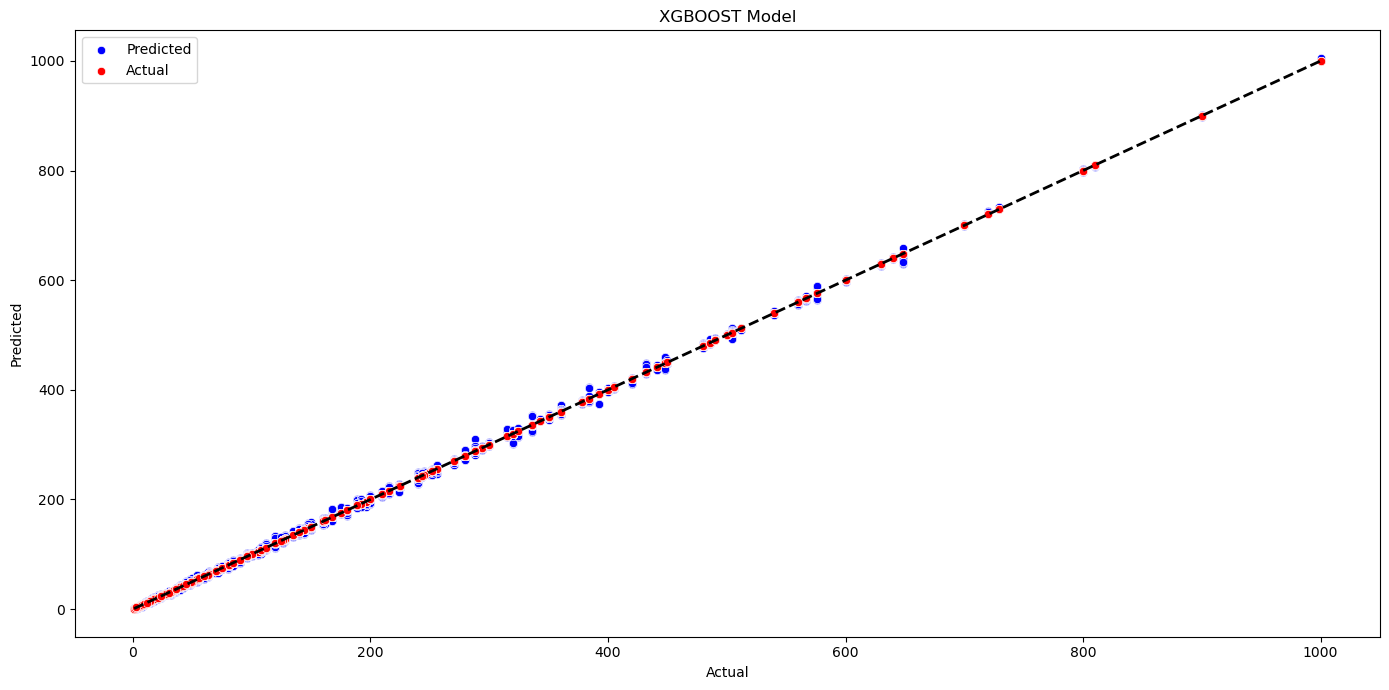

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the results
plt.figure(figsize=(14, 7))

# MLP Model
plt.subplot(1, 1, 1)

# Plot predicted values in blue
sns.scatterplot(x=y_test, y=y_pred_xgb.flatten(), color='blue', label='Predicted')

# Plot actual values in red
sns.scatterplot(x=y_test, y=y_test, color='red', label='Actual')

# Plot the identity line (45-degree line) for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBOOST Model')

# Show legend
plt.legend()

# Add titles and layout adjustments
plt.tight_layout()
plt.show()